# Цели и задачи проекта

Цель: отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Задача: провести разведывательный анализ данных и составить отчёт по его результатам --- сформулировать предположения и гипотезы для дальнейшего построения модели, проверить качество данных и очистить их, если это необходимо, определиться с параметрами модели.

### Итак, приступим!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

### Посмотрим на наши данные

In [3]:
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

# Что можно отметить?

Числовых данных: 13 столбцов. Это возраст, образование отца, образование матери, время в пути до школы, время на учёбу помимо школы в неделю, количество внеучебных неудач, (studytime, granular - необходимо проанализировать, это столбец-сюрприз), семейные отношения, свободное время после школы, проведение времени с друзьями, текущее состояние здоровья, количество пропущенных занятий, и сама целевая переменная - оценка по математике.

Категориальных данных: 17 столбцов, но 12 из них имеют бинарные значения yes/no - легко переведём их в числовые данные для нашей модели.

Всего 30 столбцов, максимум строк  - 395, есть пропуски в данных.

#### Посмотрим теперь каждый столбец отдельно, решим что делать с ним и с пропусками в частности, изучим его влияние на итоговую оценку по математике.

In [4]:
pd.DataFrame(stud.school.value_counts(dropna=False))

,school
GP,349
MS,46


#### Пропусков нет, а школ всего две. Они могут влиять на оценку, т.к. 1 школа может быть лицеем с мат.уклоном, например. Посмотрим

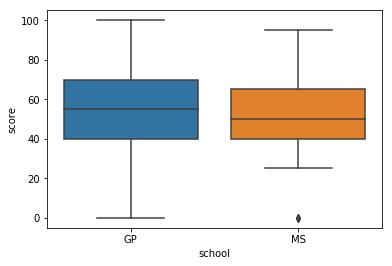

In [5]:
sns.boxplot(x='school',y='score',data=stud);

В школе GP больше данных, больше разброс оценок. В школе MS оценка "0" считается выбросом, и миинмальные оценки выше другой школы. Медиана и квартили не сильно различаются, поэтому принимаю решение - в конце анализа удалить данные о названии школ, как не влиюящие на оценку. Пока заменю на 1/0. 

In [6]:
stud['school'] = stud['school'].replace('GP', '1')
stud['school'] = stud['school'].replace('MS', '0')

##### Посмотрим теперь на пол наших учеников

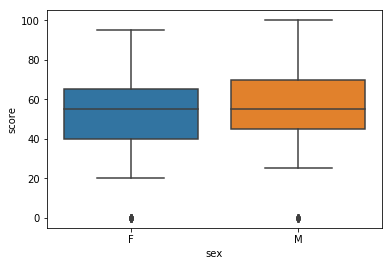

In [7]:
sns.boxplot(x='sex',y='score',data=stud);

In [8]:
pd.DataFrame(stud.sex.value_counts(dropna=False))

,sex
F,208
M,187


#### Пропусков нет, распределение по полу примерно поровну. Можно сказать, что мальчики чуть успешнее в математике, чем девушки, поэтому оставим данные и заменим F на "1", M на "0".

In [9]:
stud['sex'] = stud['sex'].replace('M', '0')
stud['sex'] = stud['sex'].replace('F', '1')

#### Посмотрим теперь на данные по возрасту учеников

In [10]:
pd.DataFrame(stud.age.value_counts(dropna=False))

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


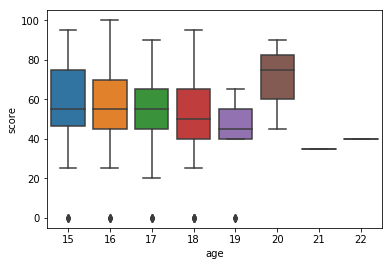

In [11]:
sns.boxplot(x='age',y='score',data=stud);

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

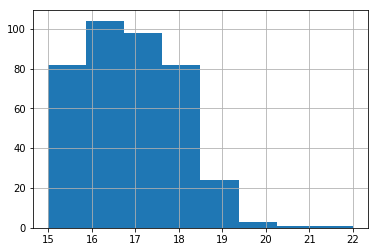

In [12]:
stud.age.hist(bins=8)
stud.age.describe()

##### Выводы: пропусков нет, 20-летнию сдают лучше, чем 19-летние, остальные  - примерно на одном уровне. Данные оставляю для модели.

Смотрим данные по месту жительства

In [13]:
pd.DataFrame(stud.address.value_counts(dropna=False))

,address
U,295
R,83
NaN,17


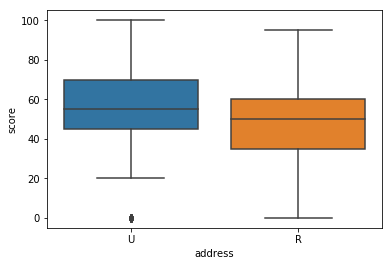

In [14]:
sns.boxplot(x='address',y='score',data=stud);

#### Есть пропуски, заменю их модой. Как видно, городские сдают математику лучше сельских учеников. Признак важен, оставлю, и заменю U на 1, R на 0 для модели.

Следом перейду к анализу размера семьи.

In [15]:
stud['address'] = stud['address'].fillna(stud['address'].mode()[0])

In [16]:
stud['address'] = stud['address'].replace('U', '1')
stud['address'] = stud['address'].replace('R', '0')

In [17]:
pd.DataFrame(stud.famsize.value_counts(dropna=False))

,famsize
GT3,261
LE3,107
NaN,27


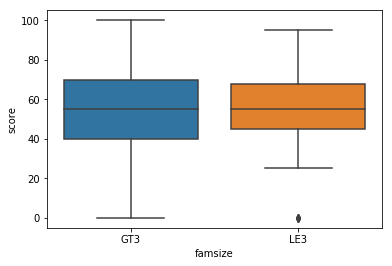

In [18]:
sns.boxplot(x='famsize',y='score',data=stud);

#### Есть пропуски, заменю их модой. Признак важен, оставлю, и заменю GT3 на 1, LE3 на 0 для модели. Выброс 0 - оставлю, т.к. столбец оценки ещё не анализировал.

Следом перейду к статусу жизни родителей.

In [19]:
stud['famsize'] = stud['famsize'].fillna(stud['famsize'].mode()[0])

In [20]:
stud['famsize'] = stud['famsize'].replace('GT3', '1')
stud['famsize'] = stud['famsize'].replace('LE3', '0')

In [21]:
pd.DataFrame(stud.Pstatus.value_counts(dropna=False))

,Pstatus
T,314
NaN,45
A,36


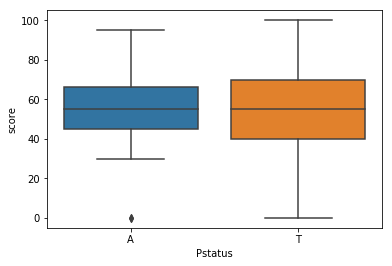

In [22]:
sns.boxplot(x='Pstatus',y='score',data=stud);

#### Видим, что в полной семье ученики лучше учаться. Но данные по статусам в пропорции 1 к 10, и это не показатель. Поэтому скорее всего удалю этот признак в конце. Пропуски пока заменю модой и приведу данные к формату 1/0.

Следом перейду к образованию матери и отца

In [23]:
stud['Pstatus'] = stud['Pstatus'].fillna(stud['Pstatus'].mode()[0])

In [24]:
stud['Pstatus'] = stud['Pstatus'].replace('T', '1')
stud['Pstatus'] = stud['Pstatus'].replace('A', '0')

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

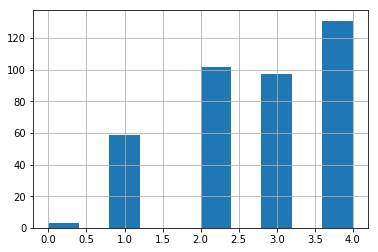

In [25]:
stud.Medu.hist(bins=10)
stud.Medu.describe()

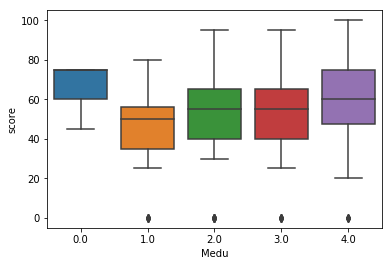

In [26]:
sns.boxplot(x='Medu',y='score',data=stud);

Очень интересный признак,пропуск заменю медианой

In [27]:
stud['Medu'] = stud['Medu'].fillna(stud['Medu'].median())

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

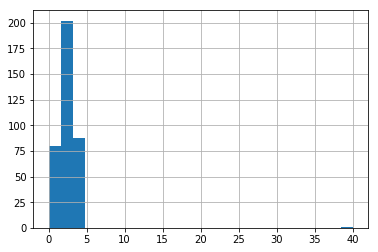

In [28]:
stud.Fedu.hist(bins=25)
stud.Fedu.describe()

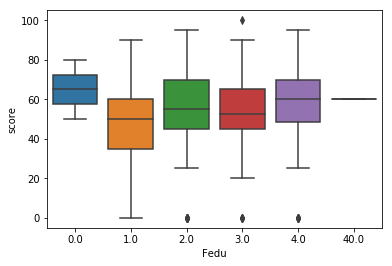

In [29]:
sns.boxplot(x='Fedu',y='score',data=stud);

А вот и выбросы пошли. Скорее всего, ошибка при внесении данных, 40 - заменю на 4, пропуски заполню медианой. Признак оставлю, т.к. неожиданно и отуствие образование у матери и у отца положительно влияет на оценку. Может быть, это стремление ученика вырваться в элиту? Но мы не психологи, а датасайентисты, поэтому продолжим анализ.

In [30]:
pd.DataFrame(stud.Fedu.value_counts(dropna=False))

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
NaN,24
0.0,2
40.0,1


In [31]:
stud.Fedu = stud.Fedu.astype(str).apply(lambda x: '4.0' if x.strip() == '40.0' else x)

In [32]:
stud['Fedu'] = stud['Fedu'].replace('nan', stud['Fedu'].median())

Изучим работу матери и отца

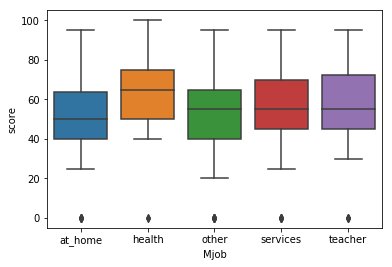

In [33]:
sns.boxplot(x='Mjob',y='score',data=stud);

In [34]:
pd.DataFrame(stud.Mjob.value_counts(dropna=False))

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32
NaN,19


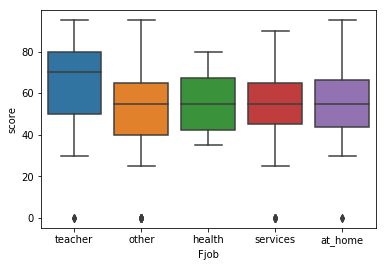

In [35]:
sns.boxplot(x='Fjob',y='score',data=stud);

In [36]:
pd.DataFrame(stud.Fjob.value_counts(dropna=False))

,Fjob
other,197
services,102
NaN,36
teacher,29
at_home,16
health,15


Как мы видим, идеальное сочетание для лучших отметок, это папа - учитель, мама - врач. Заменим данные на цифры от 0 до 4, пропуски заполним модой.

In [37]:
stud['Fjob'] = stud['Fjob'].replace('teacher', '0')
stud['Fjob'] = stud['Fjob'].replace('health', '1')
stud['Fjob'] = stud['Fjob'].replace('services', '2')
stud['Fjob'] = stud['Fjob'].replace('at_home', '3')
stud['Fjob'] = stud['Fjob'].replace('other', '4')
stud['Mjob'] = stud['Mjob'].replace('teacher', '0')
stud['Mjob'] = stud['Mjob'].replace('health', '1')
stud['Mjob'] = stud['Mjob'].replace('services', '2')
stud['Mjob'] = stud['Mjob'].replace('at_home', '3')
stud['Mjob'] = stud['Mjob'].replace('other', '4')

In [38]:
stud['Fjob'] = stud['Fjob'].fillna(stud['Fjob'].mode()[0])
stud['Mjob'] = stud['Mjob'].fillna(stud['Mjob'].mode()[0])

Изучим причину выбора школы

In [39]:
pd.DataFrame(stud.reason.value_counts(dropna=False))

,reason
course,137
home,104
reputation,103
other,34
NaN,17


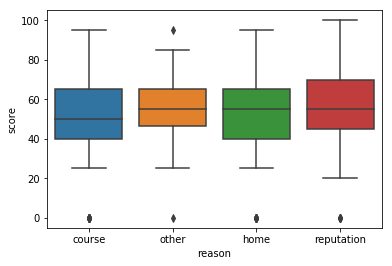

In [40]:
sns.boxplot(x='reason',y='score',data=stud);

##### Выбор школы не сильно разнится на результатах в итоговой оценке. Заменим данные на цифры от 0 до 3. Пропуски заполню модой.

In [41]:
stud['reason'] = stud['reason'].replace('course', '0')
stud['reason'] = stud['reason'].replace('other', '1')
stud['reason'] = stud['reason'].replace('home', '2')
stud['reason'] = stud['reason'].replace('reputation', '3')

In [42]:
stud['reason'] = stud['reason'].fillna(stud['reason'].mode()[0])

Изучим влияние опекунов

In [43]:
pd.DataFrame(stud.guardian.value_counts(dropna=False))

,guardian
mother,250
father,86
NaN,31
other,28


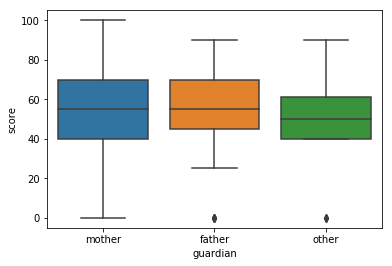

In [44]:
sns.boxplot(x='guardian',y='score',data=stud);

##### Опекун не сильно вносит разницу в результаты итоговой оценки. Заменим данные на цифры от 0 до 2. Пропуски заполню модой.

In [45]:
stud['guardian'] = stud['reason'].replace('mother', '0')
stud['guardian'] = stud['reason'].replace('father', '1')
stud['guardian'] = stud['reason'].replace('other', '2')

In [46]:
stud['guardian'] = stud['guardian'].fillna(stud['guardian'].mode()[0])

Посмотрим на время в пути до школы

In [47]:
pd.DataFrame(stud.traveltime.value_counts(dropna=False))

,traveltime
1.0,242
2.0,96
NaN,28
3.0,22
4.0,7


count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

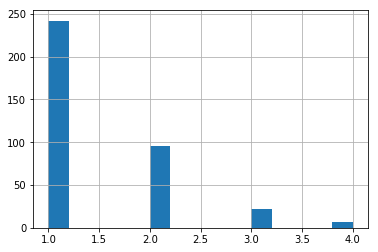

In [49]:
stud.traveltime.hist(bins=15)
stud.traveltime.describe()

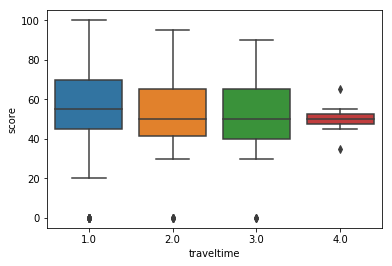

In [50]:
sns.boxplot(x='traveltime',y='score',data=stud);

Очень интересный признак! Явных выбросов нет, пропуски заменю медианой. Казалось бы, чем дольше времени в пути, тем меньше времени на учебу, но 4 часа дороги не занижают медиану оценки, но до максимума далеко. Значит, ученики учатся и в пути. Они молодцы, а я иду дальше

In [51]:
stud['traveltime'] = stud['traveltime'].fillna(stud['traveltime'].median())

Посмотирм на время на учебу помимо школы

In [52]:
pd.DataFrame(stud.studytime.value_counts(dropna=False))

,studytime
2.0,194
1.0,103
3.0,64
4.0,27
NaN,7


count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

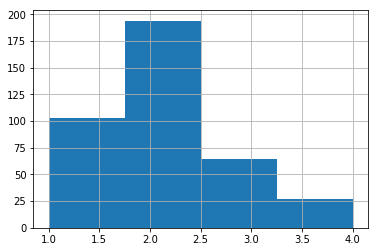

In [53]:
stud.studytime.hist(bins=4)
stud.studytime.describe()

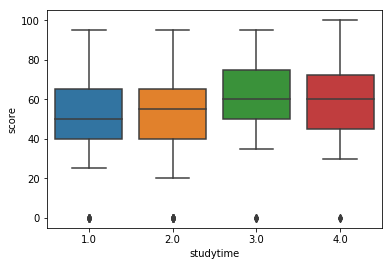

In [54]:
sns.boxplot(x='studytime',y='score',data=stud);

Очевидно, чем больше времени на дополнительную учёбу, тем выше максимальная оценка, ниже минимальная, и медиана повыше. Хороший наглядный признак. Выбросов нет, пропуски заменю на медиану.

In [55]:
stud['studytime'] = stud['studytime'].fillna(stud['studytime'].median())

Посмотрим на количество внеучебных неудач

In [56]:
pd.DataFrame(stud.failures.value_counts(dropna=False))

,failures
0.0,293
1.0,49
NaN,22
2.0,16
3.0,15


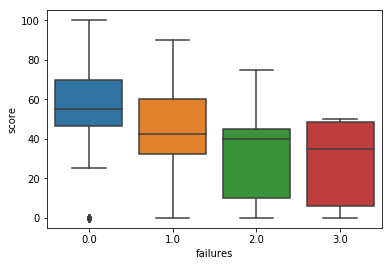

In [57]:
sns.boxplot(x='failures',y='score',data=stud);

Интересный признак! заметна связь с итоговой оценкой. Признак оставлю, пропуск заменю модой.

In [58]:
stud['failures'] = stud['failures'].fillna(stud['failures'].mode()[0])

Посмотрим на дополнительную образовательную поддержку

In [59]:
pd.DataFrame(stud.schoolsup.value_counts(dropna=False))

,schoolsup
no,335
yes,51
NaN,9


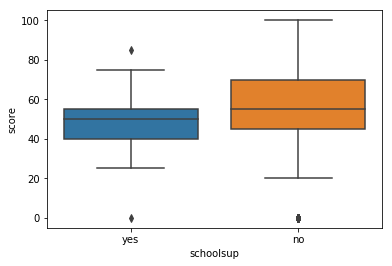

In [60]:
sns.boxplot(x='schoolsup',y='score',data=stud);

Интересный признак. Казалось бы, без доп. образовательной поддержки результаты даже лучше. Признак оставляю, пропуски заменяю модой, да и нет на 1 и 0.

In [61]:
stud['schoolsup'] = stud['schoolsup'].fillna(stud['schoolsup'].mode()[0])

In [62]:
stud['schoolsup'] = stud['schoolsup'].replace('no', '0')
stud['schoolsup'] = stud['schoolsup'].replace('yes', '1')

Посмотрим, как наши родители помогают ученикам, и влияет ли это на итоговую оценку.

In [63]:
pd.DataFrame(stud.famsup.value_counts(dropna=False))

,famsup
yes,219
no,137
NaN,39


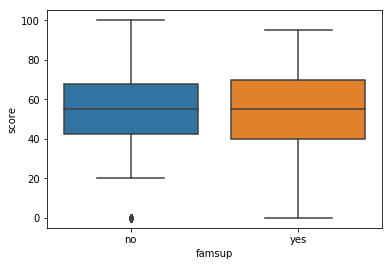

In [64]:
sns.boxplot(x='famsup',y='score',data=stud);

Как оказалось, успех учащихся находится в их собственных руках. Пока оставлю признак, пропуски заменю модой, да и нет на 1 и 0.

In [65]:
stud['famsup'] = stud['famsup'].fillna(stud['famsup'].mode()[0])

In [66]:
stud['famsup'] = stud['famsup'].replace('no', '0')
stud['famsup'] = stud['famsup'].replace('yes', '1')

Узнаем, помогают ли занятия с репетитором нашим ученикам.

In [67]:
pd.DataFrame(stud.paid.value_counts(dropna=False))

,paid
no,200
yes,155
NaN,40


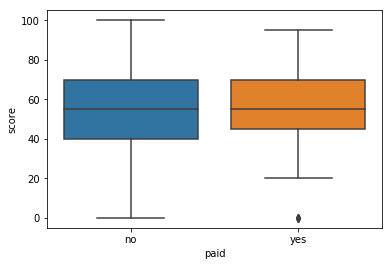

In [68]:
sns.boxplot(x='paid',y='score',data=stud);

Вот дела! можно и самому сдать лучше, оказывается. значит репетитора берут двоешники, чтобы хотябы на 3-чку сдать. Хороший признак, выброс за 0 пока не считаем. Пропуски заменим модой. Да и нет заменим на 1 и 0.

In [69]:
stud['paid'] = stud['paid'].fillna(stud['paid'].mode()[0])

In [70]:
stud['paid'] = stud['paid'].replace('no', '0')
stud['paid'] = stud['paid'].replace('yes', '1')

Изучим внеучебные занятия.

In [71]:
pd.DataFrame(stud.activities.value_counts(dropna=False))

,activities
yes,195
no,186
NaN,14


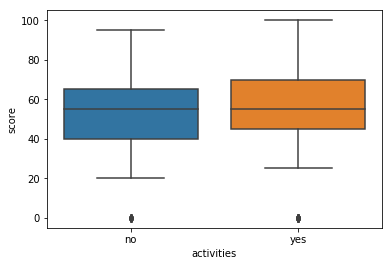

In [72]:
sns.boxplot(x='activities',y='score',data=stud);

Успешный человек - успешен во всём. Больше занятий - лучше оценки. Бочонок побольше, нижняя оценка выше, лучшая - выше. Оставим призак, пропуски заменим модой, да и нет на 0 и 1.

In [73]:
stud['activities'] = stud['activities'].fillna(stud['activities'].mode()[0])

In [74]:
stud['activities'] = stud['activities'].replace('no', '0')
stud['activities'] = stud['activities'].replace('yes', '1')

Детский сад Vs. Домашнее наблюдение

In [75]:
pd.DataFrame(stud.nursery.value_counts(dropna=False))

,nursery
yes,300
no,79
NaN,16


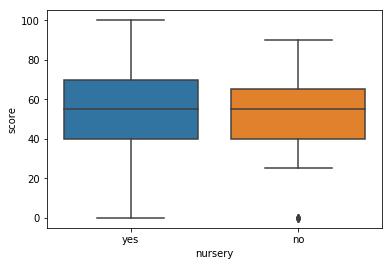

In [76]:
sns.boxplot(x='nursery',y='score',data=stud);

Садиковские друзья поуспешнее, но плохих оценок больше. Вся выборка не совсем репрезентативна. Скорее всего этот признак уйдёт в утиль. Пока его оставлю, заменю пропуски на моду, а да и нет на 0 и 1.

In [77]:
stud['nursery'] = stud['nursery'].fillna(stud['nursery'].mode()[0])

In [78]:
stud['nursery'] = stud['nursery'].replace('no', '0')
stud['nursery'] = stud['nursery'].replace('yes', '1')

А вот и сюрприз - неизвестный признак studytime, granular - изучим его.

In [79]:
stud.rename(columns=lambda x: x.replace('studytime, granular', 'studytime_granular'), inplace=True)

In [80]:
pd.DataFrame(stud.studytime_granular.value_counts(dropna=False))

,studytime_granular
-6.0,194
-3.0,103
-9.0,64
-12.0,27
NaN,7


О, оказывается это наш старый добрый столбец studytime, но умноженный на -3. Будем удалять.

In [81]:
stud.drop(['studytime_granular'], axis='columns', inplace=True)

Посомтрим дальше, как желание получить высшее образование влияет на успехи в математике.

In [82]:
pd.DataFrame(stud.higher.value_counts(dropna=False))

,higher
yes,356
NaN,20
no,19


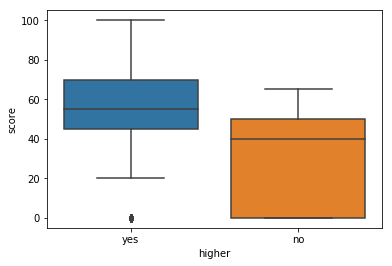

In [83]:
sns.boxplot(x='higher',y='score',data=stud);

Не врут участники опроса, хотят получить высшее - стремятся к нему, и оценки соответствующие! пропуски заменим модой, да и нет на 1 и 0. Признак показательный, оставляем.

In [84]:
stud['higher'] = stud['higher'].fillna(stud['higher'].mode()[0])

In [85]:
stud['higher'] = stud['higher'].replace('no', '0')
stud['higher'] = stud['higher'].replace('yes', '1')

Посмотрим, помогает ли учиться глобальная паутина, или только мешает и отвлекает.

In [86]:
pd.DataFrame(stud.internet.value_counts(dropna=False))

,internet
yes,305
no,56
NaN,34


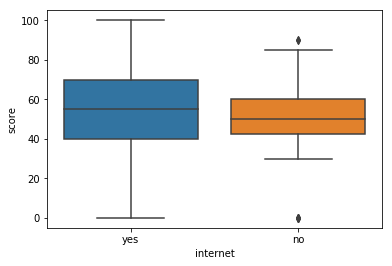

In [87]:
sns.boxplot(x='internet',y='score',data=stud);

Видим, что интернет влияет на высший балл, и на общий бочонок. оставляем признак, пропуски заменяем модой, да и нет на 1 и 0.

In [88]:
stud['internet'] = stud['internet'].fillna(stud['internet'].mode()[0])

In [89]:
stud['internet'] = stud['internet'].replace('no', '0')
stud['internet'] = stud['internet'].replace('yes', '1')

Любовь окрыляет или отвлекает?

In [90]:
pd.DataFrame(stud.romantic.value_counts(dropna=False)) 

,romantic
no,240
yes,124
NaN,31


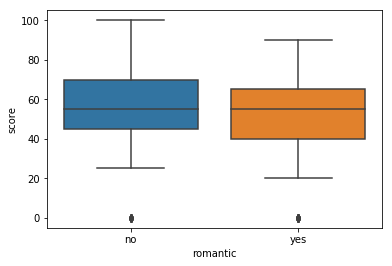

In [91]:
sns.boxplot(x='romantic',y='score',data=stud);

Сначала учеба, потом любовь! Медиана одинакова, но высший балл повыше и низший повыше у свободных молодых людей. Оставляем признак, пропуски заменим модой, да и нет на 1 и 0.

In [92]:
stud['romantic'] = stud['romantic'].fillna(stud['internet'].mode()[0])

In [93]:
stud['romantic'] = stud['romantic'].replace('no', '0')
stud['romantic'] = stud['romantic'].replace('yes', '1')

Посмотрим на семейные отношения.

In [94]:
pd.DataFrame(stud.famrel.value_counts(dropna=False))

,famrel
4.0,182
5.0,99
3.0,62
NaN,27
2.0,17
1.0,7
-1.0,1


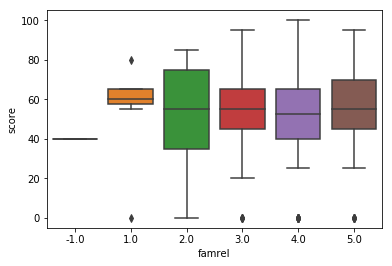

In [95]:
sns.boxplot(x='famrel',y='score',data=stud);

Интересный признак. Оценки повыше у тех, где всё хорошо в семье. Но в очень плохих отношениях бочонок компактнее и повыше,а в плохих - медиана на уровне с хорошими отношениями. Также вижу выброс, -1, это скорее всего оценка 1, заменим. А пропуски заменим медианой. 

In [96]:
stud['famrel'] = stud['famrel'].fillna(stud['famrel'].median())
stud.famrel = stud.famrel.astype(str).apply(lambda x: '1.0' if x.strip() == '-1.0' else x)

Влияние свободного времени на оценку.

In [97]:
pd.DataFrame(stud.freetime.value_counts(dropna=False))

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18
NaN,11


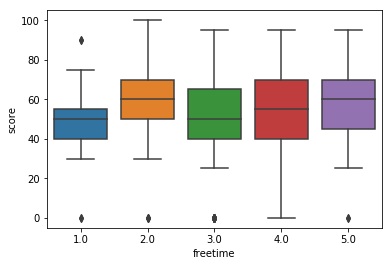

In [98]:
sns.boxplot(x='freetime',y='score',data=stud);

Свободное время - помощь в разгрузке. заменим пропуски медианой.

In [99]:
stud['freetime'] = stud['freetime'].fillna(stud['freetime'].median())

А что друзья?

In [100]:
pd.DataFrame(stud.goout.value_counts(dropna=False))

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23
NaN,8


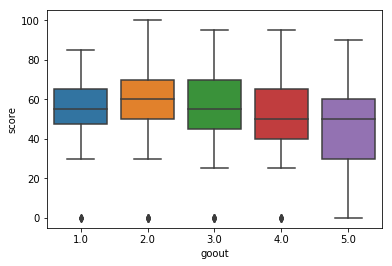

In [101]:
sns.boxplot(x='goout',y='score',data=stud);

Ботаники-одиночки и разумное малое проведенное время с друзьями - и оценки лучше. Пропуски меняю на медиану

In [102]:
stud['goout'] = stud['goout'].fillna(stud['goout'].median())

Посмотрим на влияние здоровья

In [103]:
pd.DataFrame(stud.health.value_counts(dropna=False))

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43
NaN,15


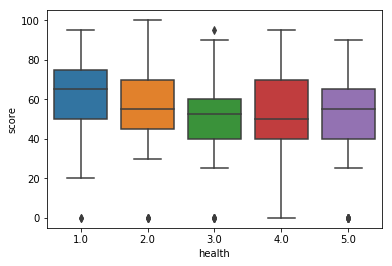

In [104]:
sns.boxplot(x='health',y='score',data=stud);

Слабое здоровье - сидим дома и учимся, отличное - всё успеваем. среднее - очевидно снижение в оценках. Признак оставляем, пропуски меняем на медиану.

In [105]:
stud['health'] = stud['health'].fillna(stud['health'].median())

А что с прогулами?

In [106]:
pd.DataFrame(stud.absences.value_counts(dropna=False))

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
NaN,12
14.0,12
3.0,8


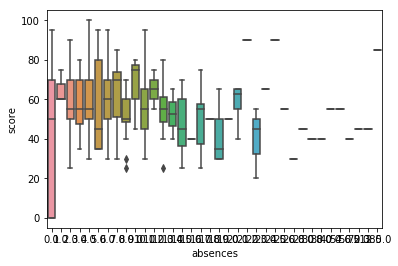

In [107]:
sns.boxplot(x='absences',y='score',data=stud);

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

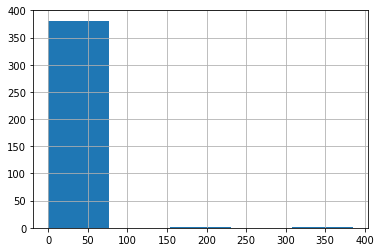

In [108]:
stud.absences.hist(bins=5)
stud.absences.describe()

Интересный признак. 200 и 300 занятий пропустить это надо постараться. Модель сильно насторожат такие цифры, поэтому применим суперсилу квратилей и избавимся от выбросов.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, iqr: 8.0,  Границы выбросов: [-12.0, 20.0].


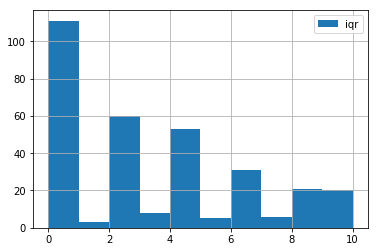

In [111]:
iqr = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "iqr: {}, ".format(iqr),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*iqr, l=perc75 + 1.5*iqr))
stud.absences.loc[stud.absences.between(perc25 - 1.5*iqr, perc75 + 1.5*iqr)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'iqr')
plt.legend()

Отфильтруем данные

In [113]:
stud = stud.loc[stud.absences.between(perc25 - 1.5*iqr, perc75 + 1.5*iqr)]

Финальный босс - оценки. Посмотрим на них!

In [114]:
pd.DataFrame(stud.score.value_counts(dropna=False))

,score
50.0,53
55.0,42
0.0,36
75.0,31
65.0,30
60.0,29
70.0,27
40.0,26
45.0,23
80.0,16


count    361.000000
mean      51.994460
std       22.956117
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

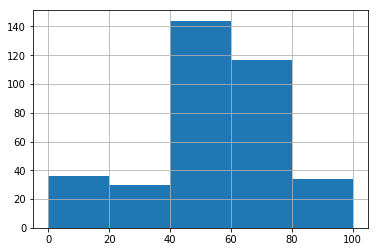

In [115]:
stud.score.hist(bins=5)
stud.score.describe()

Ну что же, выбросов нет, а оценок 0 слишком много - не будем их удалять, ведь причин может быть много - не пришел на экзамен, неправильно заполнил бланк, ошибка компьютера (или человека за ним). Пропусков мало - избавимся от них, ведь это целевая переменная.

In [116]:
stud.dropna(subset=['score'], axis=0)
stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,1,1,18,1,1,0,4.0,4.0,3,0,0,0,2.0,2.0,0.0,1,0,0,0,1,1,1,0,4.0,3.0,4.0,3.0,6.0,30.0
1,1,1,17,1,1,1,1.0,1.0,3,4,0,0,1.0,2.0,0.0,0,1,0,0,0,1,1,0,5.0,3.0,3.0,3.0,4.0,30.0
2,1,1,15,1,0,1,1.0,1.0,3,4,1,1,1.0,2.0,3.0,1,0,0,0,1,1,1,1,4.0,3.0,2.0,3.0,10.0,50.0
3,1,1,15,1,1,1,4.0,2.0,1,4,2,2,1.0,3.0,0.0,0,1,1,1,1,1,1,1,3.0,2.0,2.0,5.0,2.0,75.0
4,1,1,16,1,1,1,3.0,3.0,4,4,2,2,1.0,2.0,0.0,0,1,1,0,1,1,0,0,4.0,3.0,2.0,5.0,4.0,50.0


Проведём корреляционный анализ.

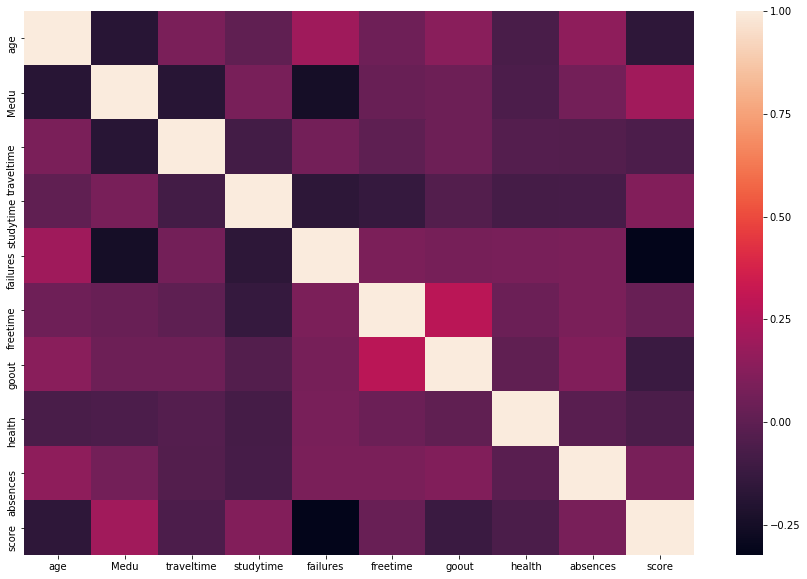

In [117]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(stud.drop(['school', 'higher'], axis=1).corr(),)

Свободное время и время с друзьями скоррелированы друг с другом, но не будем удалять. 

Остальных числовых признаков, кореллированных между собой, нет.  
А значит добавим в модель все признаки.

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.

In [118]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [122]:
for col in ['Mjob', 'Medu', 'Fedu', 'failures', 'paid', 'activities', 'internet', 'romantic', 'absences']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


In [123]:
stud_for_model = stud.loc[:, ['Mjob', 'Medu', 'Fedu', 'studytime', 'paid', 'activities', 'higher', 'internet', 'absences']]
stud_for_model.head()

,Mjob,Medu,Fedu,studytime,paid,activities,higher,internet,absences
0,3,4.0,4.0,2.0,0,0,1,1,6.0
1,3,1.0,1.0,2.0,0,0,1,1,4.0
2,3,1.0,1.0,2.0,0,0,1,1,10.0
3,1,4.0,2.0,3.0,1,1,1,1,2.0
4,4,3.0,3.0,2.0,1,0,1,0,4.0


## Вывод:

В данных есть пропуски, но выборка хорошая, подробная. Жаль, что мало числовых признаков, а для модели нужны именно числа.

Главная загвоздка: что делать с большим количестовм 0 в оценке. Нельзя убирать этот признак, т.к. он влияет на итоги модели, можно выделить в отдельный признак, т.к. причин получить 0 может быть много.

Модель можно построить. 

По графикам похоже, что параметры Medu\Fedu (объединим в один признак для модели), studytime, paid, activities, higher, internet и absences могут влиять на оценку по математике. 

Тест Стьюдента нашёл статистически значимые различия для колонки Mjob -- оставим её для модели тоже!